In [56]:
import os
from datetime import datetime
from math import exp

import matplotlib.pyplot as plt
import torch

In [57]:
checkpoint_dir = "pre_checkpoints"
info_dir = checkpoint_dir + "/info"
state_dir = checkpoint_dir + "/state"

In [58]:
files = [f for f in os.listdir(info_dir) if os.path.isfile(os.path.join(info_dir, f))]
print(len(files))

60


In [59]:
torch.load(os.path.join(info_dir, files[0]))

{'train_loss': tensor(10.0898),
 'val_loss': tensor(10.0815),
 'time': '2026-02-18T10:45:20.966274',
 'block_size': 64,
 'batch_size': 8,
 'eval_interval': 10,
 'step': 0,
 'learning_rate': 9.836065573770493e-05}

In [60]:
steps = []

for p in files:
    state = torch.load(os.path.join(info_dir, p))
    steps.append((
        state["train_loss"].item(),
        state["val_loss"].item(),
        datetime.fromisoformat(state["time"]),
        state["block_size"],
        state["batch_size"],
        state["eval_interval"],
        state["step"],
        state["learning_rate"],
    ))

In [61]:
steps = sorted(steps, key=lambda x: x[6])

In [62]:
step_count = len(steps)

x = list(range(step_count))

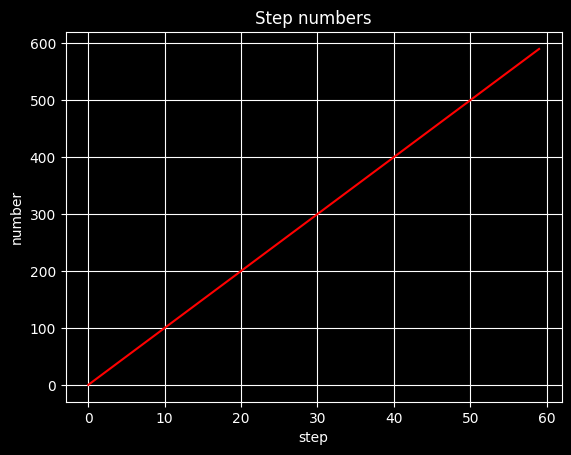

In [63]:
rate = [step[6] for step in steps]

plt.plot(x, rate, label="step number", color="red")
plt.xlabel('step')
plt.ylabel('number')
plt.title('Step numbers')
plt.grid(True)
plt.show()

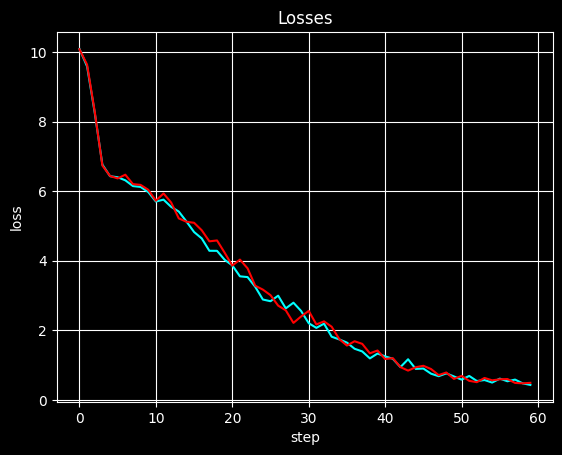

In [64]:
import matplotlib.pyplot as plt

step_count = len(steps)

x = list(range(step_count))

train_perplexity = [step[0] for step in steps]
rate = [step[1] for step in steps]

plt.plot(x, train_perplexity, label="train", color="cyan")
plt.plot(x, rate, label="test", color="red")
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Losses')
plt.grid(True)
plt.show()

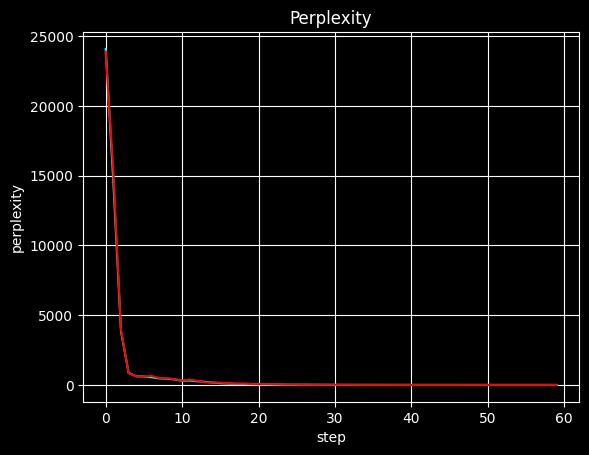

In [65]:
train_perplexity = [exp(step[0]) for step in steps]
rate = [exp(step[1]) for step in steps]

plt.plot(x, train_perplexity, label="train", color="cyan")
plt.plot(x, rate, label="test", color="red")
plt.xlabel('step')
plt.ylabel('perplexity')
plt.title('Perplexity')
plt.grid(True)
plt.show()

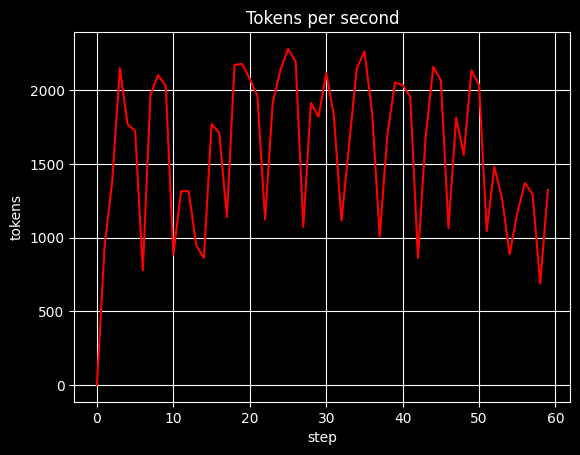

In [67]:
last_step_time: datetime | None = None
values=[]

for step in steps:

    time = step[2]
    if last_step_time is None:
        last_step_time = time
        values.append(0.0)
        continue
    time_passed = time - last_step_time
    last_step_time = time

    block_size = step[3]
    batch_size = step[4]
    eval_interval = step[5]

    tokens=block_size*batch_size*eval_interval
    tokens_per_second=tokens/time_passed.total_seconds()

    values.append(tokens_per_second)

plt.plot(x, values, color="red")
plt.xlabel('step')
plt.ylabel('tokens')
plt.title('Tokens per second')
plt.grid(True)
plt.show()

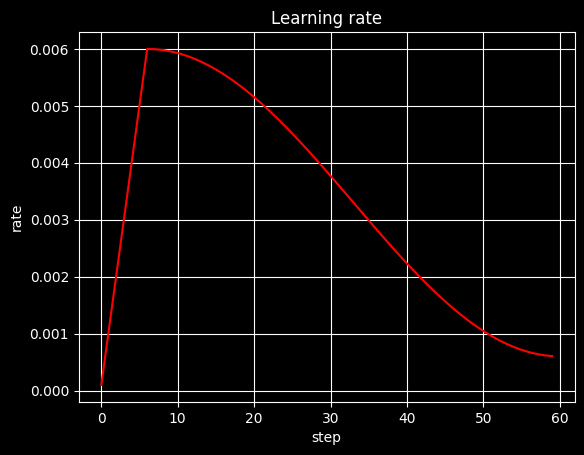

In [68]:
rate = [step[7] for step in steps]

plt.plot(x, rate, color="red")
plt.xlabel('step')
plt.ylabel('rate')
plt.title('Learning rate')
plt.grid(True)
plt.show()

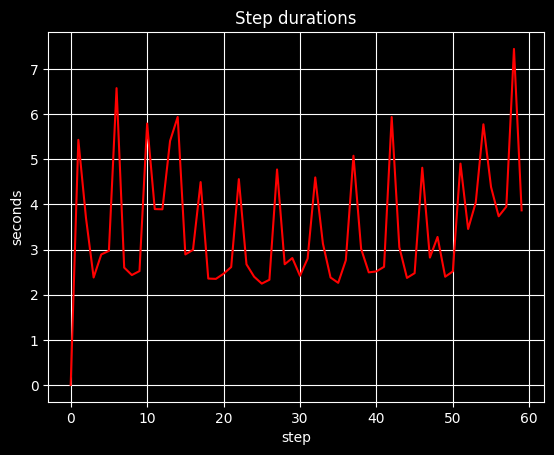

In [69]:
last_step_time: datetime | None = None

durations=[]

for step in steps:
    time = step[2]
    if last_step_time is None:
        last_step_time = time
        durations.append(0.0)
        continue
    time_passed = time - last_step_time
    last_step_time = time
    durations.append(time_passed.total_seconds())

plt.plot(x, durations, color="red")
plt.xlabel('step')
plt.ylabel('seconds')
plt.title('Step durations')
plt.grid(True)
plt.show()